# Visualizing using graphviz

In [1]:
#%reset
import graphviz
import pickle
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
import pydotplus
from six import StringIO 
from IPython.display import Image
import matplotlib.pyplot as plt
import string
import numpy as np
from PIL import Image


hfont = {'fontname':'Helvetica'}


# Full model, all weeks 

[Text(0.4642857142857143, 0.9, 'admits <= 20.396\nentropy = 0.941\nsamples = 64770\nvalue = [23.53, 42.261]'),
 Text(0.23809523809523808, 0.7, 'admits <= 10.142\nentropy = 0.652\nsamples = 13157\nvalue = [21.085, 4.242]'),
 Text(0.09523809523809523, 0.5, 'cases <= 20.5\nentropy = 0.445\nsamples = 8781\nvalue = [15.733, 1.602]'),
 Text(0.047619047619047616, 0.3, 'entropy = 0.249\nsamples = 2157\nvalue = [5.521, 0.238]'),
 Text(0.14285714285714285, 0.3, 'deaths <= 1.554\nentropy = 0.523\nsamples = 6624\nvalue = [10.212, 1.364]'),
 Text(0.09523809523809523, 0.1, 'entropy = 0.41\nsamples = 3782\nvalue = [6.194, 0.554]'),
 Text(0.19047619047619047, 0.1, 'entropy = 0.653\nsamples = 2842\nvalue = [4.018, 0.81]'),
 Text(0.38095238095238093, 0.5, 'icu <= 8.5\nentropy = 0.915\nsamples = 4376\nvalue = [5.352, 2.639]'),
 Text(0.3333333333333333, 0.3, 'cases <= 66.5\nentropy = 0.841\nsamples = 2953\nvalue = [4.739, 1.748]'),
 Text(0.2857142857142857, 0.1, 'entropy = 0.804\nsamples = 2207\nvalue = [

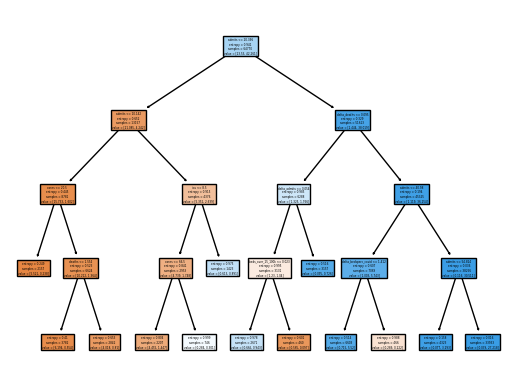

In [53]:
model_name = f"/Users/rem76/Documents/COVID_projections/COVID_forecasting/Full_auroc_0.9080_period_pruned.sav"
#pickle.dump(clf, open(model_name, 'wb'))
clf_full_period = pickle.load(open(model_name, 'rb'))
plot_tree(clf_full_period, feature_names=['cases','delta_cases', 'deaths', 'delta_deaths', 'admits', 'delta_admits', 'icu', 'delta_icu',  'beds', 'delta_beds' 'perc_covid', 'delta_perc', 'beds_over_15_100k'], filled=True)

In [54]:
feature_names=['Cases','\u0394 Cases', 'Deaths', '\u0394 Deaths', 'Admissions', '\u0394 Admissions', 'ICU', '\u0394 ICU',  'Beds', '\u0394 Beds', 'Percent of beds', '\u0394 Perc. beds', 'Hospital capacity exceeded']

In [62]:
# Create StringIO objects to store dot data
dot_datas = []

# Your classifiers
classifiers = [clf_full_period]
feature_names_options = [feature_names]


for i, clf in enumerate(classifiers):
    dot_data = StringIO()
    export_graphviz(clf, 
                    out_file=dot_data, 
                    class_names=['Over', 'Under'], # the target names.
                    feature_names=feature_names_options[i], # the feature names.
                    filled=True, # Whether to fill in the boxes with colors.
                    rounded=True, # Whether to round the corners of the boxes.
                    special_characters=True, 
                    proportion=False,
                    precision=1, 
                    impurity=False)
    dot_datas.append(dot_data.getvalue())
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    simplify_labels_graphviz(graph)
    graph.set_size('"7.5,7.5!"')

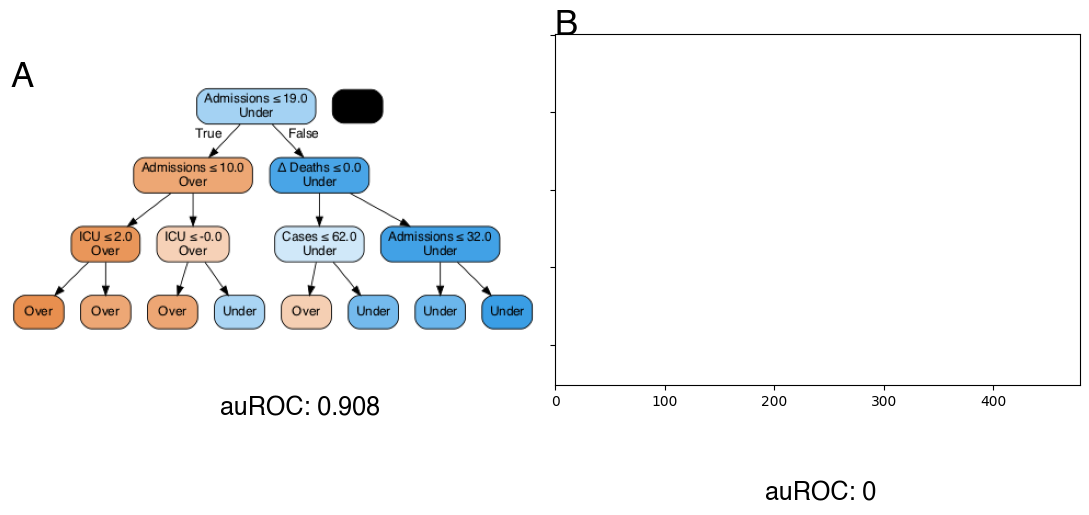

In [63]:
fig, axs = plt.subplots(1,2, figsize=(11, 5.5), facecolor='w', edgecolor='k', sharex = 'all', sharey = 'all')
auROC = [0.908, 0]
axs.ravel()
for i, dot_data in enumerate(dot_datas):
    # Load the saved image for debugging
    img = Image.open(f'graph_{i}.png')
    axs[i].imshow(np.array(img))
    axs[i].axis('off')
add_labels_to_subplots(axs, hfont, 1.1, fontsize = 25)
for i, ax in enumerate(axs):
        ax.text(ax.get_xlim()[1]/2.5, ax.get_ylim()[1] * -600, f'auROC: {auROC[i]}', fontsize=18, **hfont)
plt.tight_layout()

plot_name = '/Users/rem76/Documents/COVID_projections/COVID_forecasting/Graphs/Full_classifier_3_week_period_shifted_pruned_simplified.png'
plt.savefig(plot_name, dpi = 500)

In [49]:
dot_data = StringIO()
tree.export_graphviz(clf, 
 out_file=dot_data, 
 class_names=['Over', 'Under'], # the target names.
 feature_names= feature_names, # the feature names.
 filled=True, # Whether to fill in the boxes with colours.
 rounded=True, # Whether to round the corners of the boxes.
 special_characters=True, 
 proportion=False,
 precision = 3, 
 impurity=False)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph_period_full = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
simplify_labels_graphviz(graph_period_full)
ax.text(ax.get_xlim()[1]/4, ax.get_ylim()[1] * -0.300, f'auROC: 0.908', fontsize=18, **hfont)
graph_period_full.write_png(f'/Users/rem76/Documents/COVID_projections/COVID_forecasting/Full_classifier_3_week_period_pruned_simplified.png')  # Save the graph as PNG


True

# Full Classifier with exact 3 weeks

In [130]:
model_name = f"Best_models/CDC_full_auroc_0.7837_exact_pruned.sav"
#pickle.dump(clf, open(model_name, 'wb'))
clf_exact_full = pickle.load(open(model_name, 'rb'))

In [131]:
dot_data = StringIO()
tree.export_graphviz(clf_exact_full, 
 out_file=dot_data, 
 class_names=['Over', 'Under'], # the target names.
 feature_names= feature_names, # the feature names.
 filled=True, # Whether to fill in the boxes with colours.
 rounded=True, # Whether to round the corners of the boxes.
 special_characters=True, 
 proportion=False,
 precision = 3, 
 impurity=False)

graph_exact_full = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
simplify_labels_graphviz(graph_exact_full)
graph_period_full.write_png(f'Full_classifier_3_week_exact_pruned_simplified.png')  # Save the graph as PNG



True

# Full Classifier with shifted period

In [132]:
model_name = f"Best_models/CDC_full_auroc_0.6821_shifted_pruned.sav"
#pickle.dump(clf, open(model_name, 'wb'))
clf_shifted_full = pickle.load(open(model_name, 'rb'))

In [183]:
dot_data = StringIO()
tree.export_graphviz(clf_exact_full, 
 out_file=dot_data, 
 class_names=['Over', 'Under'], # the target names.
 feature_names= feature_names, # the feature names.
 filled=True, # Whether to fill in the boxes with colours.
 rounded=True, # Whether to round the corners of the boxes.
 special_characters=True, 
 proportion=False,
 precision = 3, 
 impurity=False)

graph_shifted_full = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
simplify_labels_graphviz(graph_shifted_full)
graph_shifted_full.write_png(f'Full_classifier_3_week_shifted_pruned_simplified.png')  # Save the graph as PNG

True

# CDC Specific Time Period Classifier 

In [195]:
model_name = f"CDC_classifier_auroc_0.7321_CDC_period.sav"
clf_CDC_period = pickle.load(open(model_name, 'rb'))
feature_names_CDC = ['Cases', 'Admits','Percent Covid']

In [200]:
dot_data = StringIO()
tree.export_graphviz(clf_CDC_period, 
 out_file=dot_data, 
 class_names=['Over', 'Under'], # the target names.
 feature_names= feature_names_CDC, # the feature names.
 filled=True, # Whether to fill in the boxes with colours.
 rounded=True, # Whether to round the corners of the boxes.
 special_characters=True, 
 proportion=False,
 precision = 3, 
 impurity=False)

graph_CDC_period = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
simplify_labels_graphviz(graph_CDC_period)
graph_CDC_period.write_png(f'CDC_classifiers_CDC_time_period.png')  # Save the graph as PNG



True

In [8]:
def simplify_labels_graphviz(graph):
        for node in graph.get_node_list():
                if node.get_attributes().get('label') is None:
                    continue
                else:
                    split_label = node.get_attributes().get('label').split('<br/>')
                    if len(split_label) == 4:
                        split_label[3]  =  split_label[3].split('=')[1].strip()

                        del(split_label[1])  # number of samples
                        del(split_label[1])  # split of sample
                    elif len(split_label) == 3:  # for a terminating node, no rule is provided
                        split_label[2]  =  split_label[2].split('=')[1].strip()


                        del(split_label[0])  # number of samples
                        del(split_label[0])  # split of samples
                        split_label[0] = '<' + split_label[0]
                    node.set('label', '<br/>'.join(split_label))

# Naive Classifiers

In [13]:

def add_labels_to_subplots(axs, hfont, height, fontsize):
    labels_subplots = list(string.ascii_uppercase)
    for i, ax in enumerate(axs):
        ax.text(
            ax.get_xlim()[0],
            ax.get_ylim()[1] * height,
            labels_subplots[i],
            fontsize=fontsize,
            **hfont,
        )
    return labels_subplots


In [19]:
feature_names_naive=['Hospital capacity exceeded']

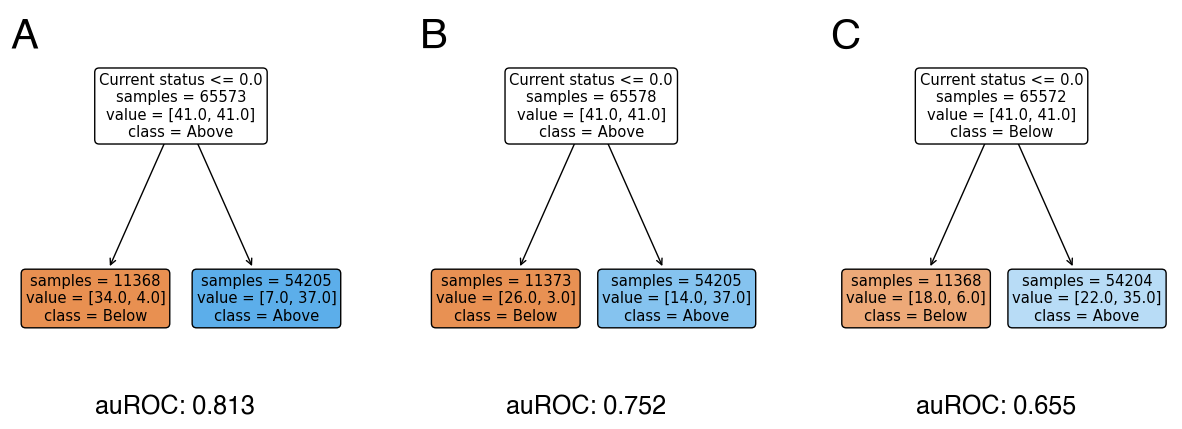

In [17]:
fig, axs = plt.subplots(1,3, figsize=(15, 5), facecolor='w', edgecolor='k', sharex = 'all', sharey = 'all')
clf_naive_period = pickle.load(open("Best_models/Naive_model_auroc_0.8134582_period.sav" , 'rb'))
clf_naive_exact =  pickle.load(open("Best_models/Naive_model_auroc_0.7518215_exact.sav", 'rb'))
clf_naive_shifted =  pickle.load(open("Best_models/Naive_model_auroc_shifted_0.6548.sav" , 'rb'))
axs.ravel()
auROC = [0.813, 0.752, 0.655]
plot_tree(clf_naive_period, ax=axs[0], feature_names=['Current status'], class_names=['Below', 'Above'], filled=True, impurity=False, proportion=False, rounded=True, precision=0)
plot_tree(clf_naive_exact, ax=axs[1], feature_names=['Current status'], class_names=['Below', 'Above'], filled=True, impurity=False, proportion=False, rounded=True, precision=0)
plot_tree(clf_naive_shifted, ax=axs[2], feature_names=['Current status'], class_names=['Below', 'Above'], filled=True, impurity=False, proportion=False, rounded=True, precision=0)
#plt.tight_layout()
add_labels_to_subplots(axs, hfont, 0.9)
for i, ax in enumerate(axs):
        ax.text(ax.get_xlim()[1]/4, ax.get_ylim()[1] * -0.05, f'auROC: {auROC[i]}', fontsize=18, **hfont)


In [20]:
dot_data = StringIO()
tree.export_graphviz(clf_naive_period, 
 out_file=dot_data, 
 class_names=['Over', 'Under'], # the target names.
 feature_names= feature_names_naive, # the feature names.
 filled=True, # Whether to fill in the boxes with colours.
 rounded=True, # Whether to round the corners of the boxes.
 special_characters=True, 
 proportion=False,
 precision = 3, 
 impurity=False)

graph_naive_period = pydotplus.graph_from_dot_data(dot_data.getvalue()) 


dot_data = StringIO()
tree.export_graphviz(clf_naive_exact, 
 out_file=dot_data, 
 class_names=['Over', 'Under'], # the target names.
 feature_names= feature_names_naive, # the feature names.
 filled=True, # Whether to fill in the boxes with colours.
 rounded=True, # Whether to round the corners of the boxes.
 special_characters=True, 
 proportion=False,
 precision = 3, 
 impurity=False)

graph_naive_exact = pydotplus.graph_from_dot_data(dot_data.getvalue()) 


dot_data = StringIO()
tree.export_graphviz(clf_naive_shifted, 
 out_file=dot_data, 
 class_names=['Over', 'Under'], # the target names.
 feature_names= feature_names_naive, # the feature names.
 filled=True, # Whether to fill in the boxes with colours.
 rounded=True, # Whether to round the corners of the boxes.
 special_characters=True, 
 proportion=False,
 precision = 3, 
 impurity=False)

graph_naive_shifted = pydotplus.graph_from_dot_data(dot_data.getvalue()) 

In [22]:
simplify_labels_graphviz(graph_naive_period)
simplify_labels_graphviz(graph_naive_exact)
simplify_labels_graphviz(graph_naive_shifted)

In [49]:

# Create StringIO objects to store dot data
dot_datas = []

# Your classifiers
classifiers = [clf_naive_period, clf_naive_exact, clf_naive_shifted]

for clf in classifiers:
    dot_data = StringIO()
    tree.export_graphviz(clf, 
                         out_file=dot_data, 
                         class_names=['Over', 'Under'], # the target names.
                         feature_names=feature_names_naive, # the feature names.
                         filled=True, # Whether to fill in the boxes with colors.
                         rounded=True, # Whether to round the corners of the boxes.
                         special_characters=True, 
                         proportion=False,
                         precision=0, 
                         impurity=False)
    dot_datas.append(dot_data.getvalue())
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    simplify_labels_graphviz(graph)
    graph.set_size('"7.5, 7.5!"')

    graph.write_png(f'graph_{classifiers.index(clf)}.png')  # Save the graph as PNG


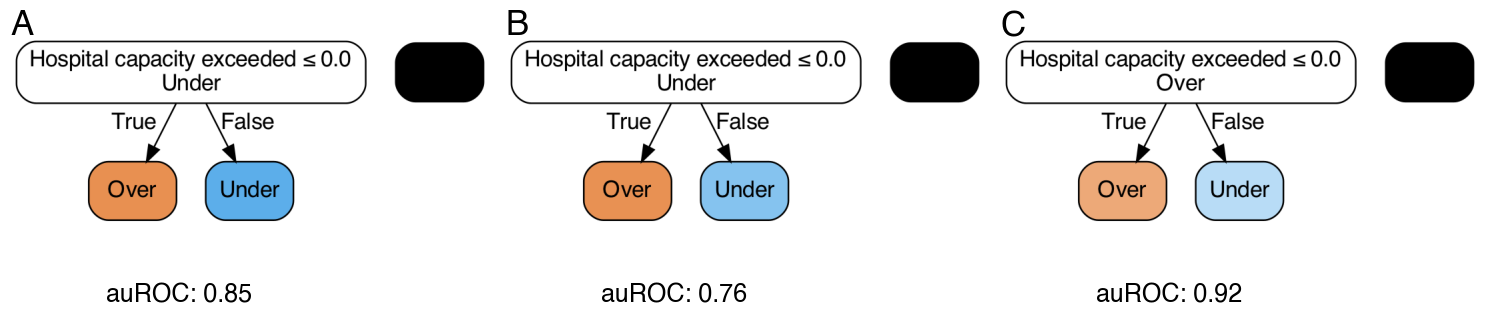

In [66]:
fig, axs = plt.subplots(1,3, figsize=(15, 5), facecolor='w', edgecolor='k', sharex = 'all', sharey = 'all')

axs.ravel()
for i, dot_data in enumerate(dot_datas):
    # Load the saved image for debugging
    img = Image.open(f'graph_{i}.png')
    axs[i].imshow(np.array(img))
    axs[i].axis('off')
add_labels_to_subplots(axs, hfont, 1.1, fontsize = 25)
for i, ax in enumerate(axs):
        ax.text(ax.get_xlim()[1]/5, ax.get_ylim()[1] * -800, f'auROC: {auROC[i]}', fontsize=18, **hfont)
plt.tight_layout()

plt.savefig('Graphs/Naive_classifier_all_simplified.png', dpi = 300)


# Optimized CDC Classifiers

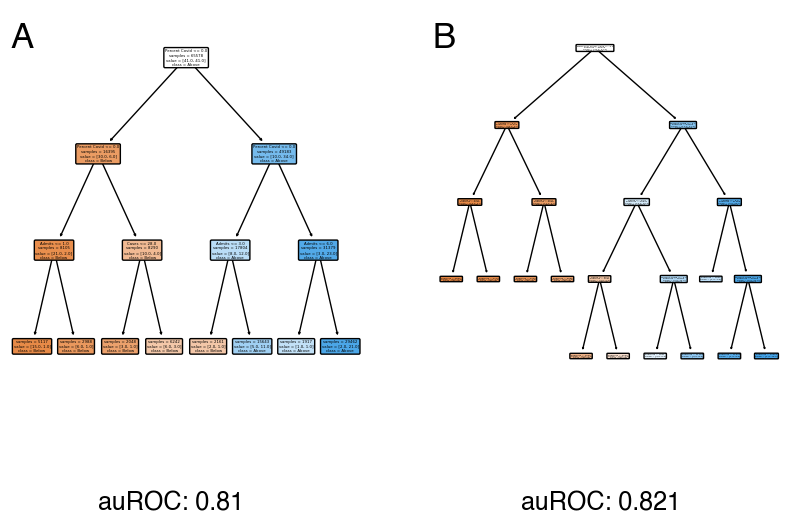

In [40]:
fig, axs = plt.subplots(1,2, figsize=(10, 5), facecolor='w', edgecolor='k', sharex = 'all', sharey = 'all')
CDC_exact = pickle.load(open("/Users/rem76/Documents/COVID_projections/COVID_forecasting/CDC_optimized_exact_auroc_0.8100_pruned.sav", 'rb'))
CDC_exact_enhanced = pickle.load(open("/Users/rem76/Documents/COVID_projections/COVID_forecasting/CDC_optimized_exact_enhanced_auroc_0.8209_pruned.sav", 'rb'))
feature_names_CDC=['Cases', 'Admits','Percent Covid']
feature_names_enhanced=['Cases', 'Admits','Percent Covid', 'Exceed threshold']

axs.ravel()
auROC = [0.810, 0.821]
plot_tree(CDC_exact, ax=axs[0], feature_names=['Cases', 'Admits','Percent Covid'], class_names=['Below', 'Above'], filled=True, impurity=False, proportion=False, rounded=True, precision=0)
plot_tree(CDC_exact_enhanced, ax=axs[1], feature_names=['Cases', 'Admits','Percent Covid', 'Beds over 15 per 100k'], class_names=['Below', 'Above'], filled=True, impurity=False, proportion=False, rounded=True, precision=0)
#plt.tight_layout()
add_labels_to_subplots(axs, hfont, 0.9, fontsize = 25)
for i, ax in enumerate(axs):
        ax.text(ax.get_xlim()[1]/4, ax.get_ylim()[1] * -0.300, f'auROC: {auROC[i]}', fontsize=18, **hfont)


In [38]:
# Create StringIO objects to store dot data
dot_datas = []

# Your classifiers
classifiers = [CDC_exact, CDC_exact_enhanced]
feature_names_options = [feature_names_CDC,feature_names_enhanced]


for i, clf in enumerate(classifiers):
    dot_data = StringIO()
    export_graphviz(clf, 
                    out_file=dot_data, 
                    class_names=['Over', 'Under'], # the target names.
                    feature_names=feature_names_options[i], # the feature names.
                    filled=True, # Whether to fill in the boxes with colors.
                    rounded=True, # Whether to round the corners of the boxes.
                    special_characters=True, 
                    proportion=False,
                    precision=1, 
                    impurity=False)
    dot_datas.append(dot_data.getvalue())
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    simplify_labels_graphviz(graph)
    graph.set_size('"7.5,7.5!"')

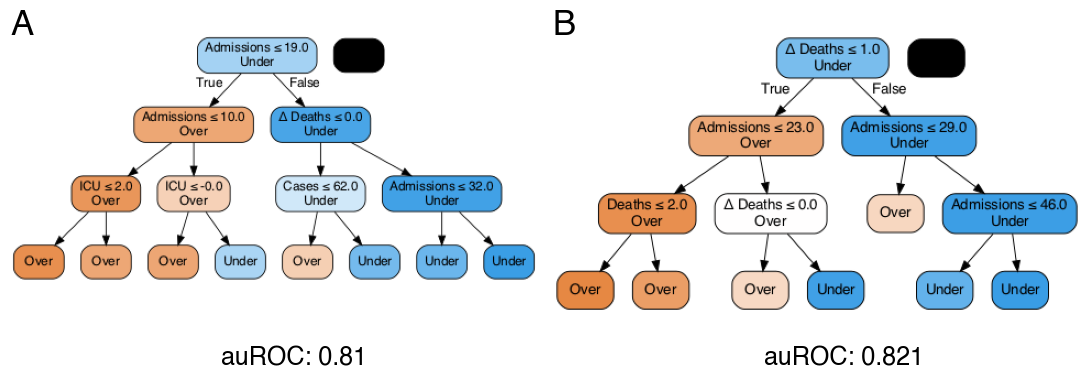

In [44]:
fig, axs = plt.subplots(1,2, figsize=(11, 5.5), facecolor='w', edgecolor='k', sharex = 'all', sharey = 'all')

axs.ravel()
for i, dot_data in enumerate(dot_datas):
    # Load the saved image for debugging
    img = Image.open(f'graph_{i}.png')
    axs[i].imshow(np.array(img))
    axs[i].axis('off')
add_labels_to_subplots(axs, hfont, 1.1, fontsize = 25)
for i, ax in enumerate(axs):
        ax.text(ax.get_xlim()[1]/2.5, ax.get_ylim()[1] * -600, f'auROC: {auROC[i]}', fontsize=18, **hfont)
plt.tight_layout()

plot_name = '/Users/rem76/Documents/COVID_projections/COVID_forecasting/Graphs/CDC_classifiers_all.png'
plt.savefig(plot_name, dpi = 500)


# Delta and omricon full classifiers

In [190]:
model_name = f"CDC_full_auroc_0.8064_period_delta_wave.sav"
clf_delta = pickle.load(open(model_name, 'rb'))

model_name = f"CDC_full_auroc_0.8167_period_omicron_wave.sav"
clf_omicron = pickle.load(open(model_name, 'rb'))


In [191]:
feature_names_CDC = ['Cases', 'Admits','Percent Covid']
dot_datas = []
Full_period_delta_graph, dot_datas = generate_decision_tree_graph(clf_delta, ['Over', 'Under'], feature_names = feature_names, dot_datas= dot_datas)
Full_period_omicron_graph,dot_datas = generate_decision_tree_graph(clf_omicron, ['Over', 'Under'], feature_names = feature_names, dot_datas= dot_datas)


simplify_labels_graphviz(Full_period_delta_graph)
simplify_labels_graphviz(Full_period_omicron_graph)

# Your classifiers

Full_period_delta_graph.set_size('"3.5, 8.5!"')

Full_period_delta_graph.write_png(f'graph_0.png')  # Save the graph as PNG



Full_period_omicron_graph.set_size('"5.5, 5.5!"')

Full_period_omicron_graph.write_png(f'graph_1.png')  # Save the graph as PNG

True

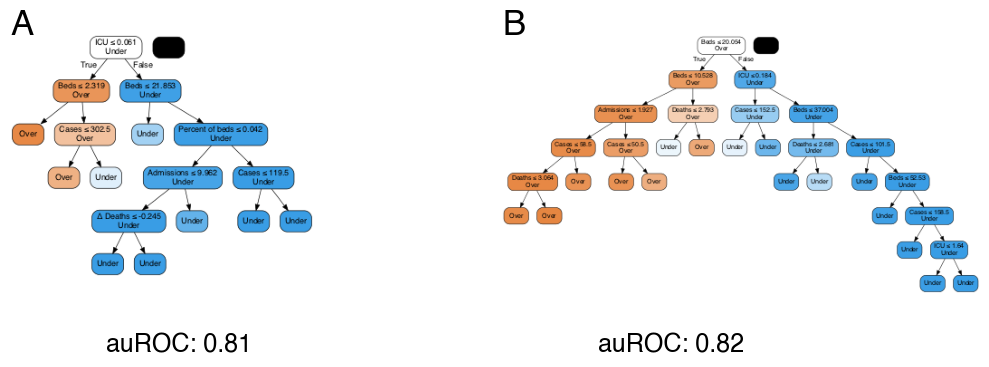

In [192]:
fig, axs = plt.subplots(1,2, figsize=(10, 5.5), facecolor='w', edgecolor='k', sharex = 'all', sharey = 'all')
auROC = [0.81, 0.82]
axs.ravel()
for i, dot_data in enumerate(dot_datas):
    # Load the saved image for debugging
    img = Image.open(f'graph_{i}.png')
    axs[i].imshow(np.array(img))
    axs[i].axis('off')
add_labels_to_subplots(axs, hfont, 1.1, fontsize = 25)
for i, ax in enumerate(axs):
        ax.text(ax.get_xlim()[1]/5, ax.get_ylim()[1] * -700, f'auROC: {auROC[i]}', fontsize=18, **hfont)
#Adjust gaps between subplots
plt.subplots_adjust(wspace=0.01)
plt.tight_layout()
plt.savefig('Graphs/Full_classifier_period_specific_strains_simplified.png', dpi = 300)


# Six month models

In [3]:
new_directory = '/Users/rem76/Documents/COVID_projections/Six_month_models/'
os.chdir(new_directory)

In [4]:
from IPython.display import Image
from IPython.display import display

In [ ]:
weeks_to_predict = range(1, 121 - 13 - 3 - 26)
time_period = 'period'
# Number of iterations and features
feature_names=feature_names=['Cases','\u0394 Cases', 'Deaths', '\u0394 Deaths', 'Admissions', '\u0394 Admissions', 'ICU', '\u0394 ICU',  'Beds', '\u0394 Beds', 'Percent of beds', '\u0394 Perc. beds', 'Hospital capacity exceeded']
num_features = len(feature_names)

# Initialize a dictionary to store feature importance counts
feature_importance_counts = {feature_name: 0 for feature_name in feature_names}

# Loop through iterations
for prediction_week in weeks_to_predict:
    # Create the training data
    #X_train_full_period, y_train_full_period, weights_full_period, missing_data_train_HSA = prep_training_test_data_period(HSA_weekly_data_all, no_weeks=range(prediction_week, int(prediction_week + 26) + 1), weeks_in_future=3, geography='HSA_ID', weight_col='weight', keep_output=True)

    #weights_full_period = weights_full_period[0].to_numpy()
    
    # Load and train the model 
    model_name = "Full_model_" + time_period + "_" + str(prediction_week) + ".sav"

    clf_full_period = pickle.load(open(model_name, 'rb'))
    #clf_full_period.fit(X_train_full_period, y_train_full_period, sample_weight=weights_full_period)

    # Get feature importances for this iteration
    dot_data = StringIO()
    tree.export_graphviz(clf_full_period, 
    out_file=dot_data, 
    class_names=['Over', 'Under'], # the target names.
    feature_names= feature_names, # the feature names.
    filled=True, # Whether to fill in the boxes with colours.
    rounded=True, # Whether to round the corners of the boxes.
    special_characters=True, 
    proportion=False,
    precision = 3, 
    impurity=False)

    clf_full_period = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
    simplify_labels_graphviz(clf_full_period)
    display(Image(clf_full_period.create_png()))
    plot_name = '/Users/rem76/Documents/COVID_projections/COVID_forecasting/Graphs/Full_period_6_month_classifiers/' + "Full_model_" + time_period + "_" + str(prediction_week) + ".png"
    clf_full_period.write_png(plot_name)

Best and worst model 

In [5]:
Best_model = "Full_model_period_best_model_.sav"
Worst_model = "Full_model_period_worst_model_.sav"

clf_full_period_best = pickle.load(open(Best_model, 'rb'))
clf_full_period_worst = pickle.load(open(Worst_model, 'rb'))

In [22]:
feature_names=feature_names=['Cases','\u0394 Cases', 'Deaths', '\u0394 Deaths', 'Admissions', '\u0394 Admissions', 'ICU', '\u0394 ICU',  'Beds', '\u0394 Beds', 'Percent of beds', '\u0394 Perc. beds', 'Hospital capacity exceeded']

# Create StringIO objects to store dot data
dot_datas = []

# Your classifiers
classifiers = [clf_full_period_best,clf_full_period_worst]

for clf in classifiers:
    dot_data = StringIO()
    tree.export_graphviz(clf, 
                         out_file=dot_data, 
                         class_names=['Over', 'Under'], # the target names.
                         feature_names=feature_names, # the feature names.
                         filled=True, # Whether to fill in the boxes with colors.
                         rounded=True, # Whether to round the corners of the boxes.
                         special_characters=True, 
                         proportion=False,
                         precision=0, 
                         impurity=False)
    dot_datas.append(dot_data.getvalue())
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    simplify_labels_graphviz(graph)
    
    #graph.set_graph_defaults(ranksep='0.01', nodesep='0.01')  # Adjust these values as needed
    graph.set_size('10, 3.4')  # Adjust the size as needed (in inches)
    graph.set_size('5, 3')  # Adjust the size as needed (in inches)

    graph.write_png(f'graph_{classifiers.index(clf)}.png')  

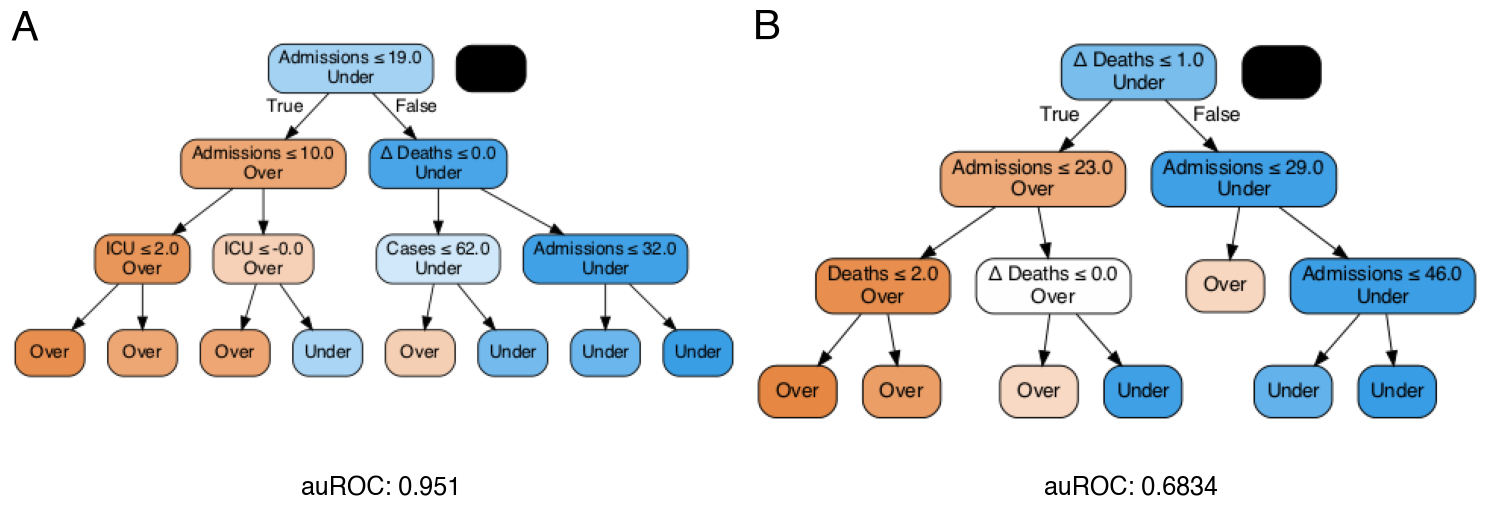

In [30]:
fig, axs = plt.subplots(1,2, figsize=(15, 7.5), facecolor='w', edgecolor='k', sharex = 'all', sharey = 'all')
auROC = [0.951, 0.6834]
axs.ravel()
for i, dot_data in enumerate(dot_datas):
    # Load the saved image for debugging
    img = Image.open(f'graph_{i}.png')
    axs[i].imshow(np.array(img))
    axs[i].axis('off')
add_labels_to_subplots(axs, hfont, 1.1, fontsize = 30)
for i, ax in enumerate(axs):
        ax.text(ax.get_xlim()[1]/2.5, ax.get_ylim()[1] * -600, f'auROC: {auROC[i]}', fontsize=18, **hfont)
#Adjust gaps between subplots
plt.subplots_adjust(wspace=0.6)
plt.tight_layout()
plot_name = '/Users/rem76/Documents/COVID_projections/COVID_forecasting/Graphs/Full_period_6_month_classifiers/Best_Worst_Classifiers.png'
plt.savefig(plot_name, dpi = 500)
